반드시 들어가야 하는 내용 (Mission)
앞서서 여러분에게 최대한의 자유를 드린다고 했지만, 그래도 발표에 반드시 포함되어야 하는 내용은 다음과 같습니다.

지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

1.지역은 어떻게 구분했나요?
- 지역별로 선호하는 게임의 장르를 파악했나요?
- 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?

2.연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
- 트렌드는 어떤 것을 기준으로 파악했나요?
- 연도별로 트렌드가 존재하나요?
- 왜 존재한다/존재하지 않는다고 생각했나요?

3.인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
- 인기가 많다는 것을 어떻게 정의했나요?
- 해당 게임이 왜 인기가 많다고 생각했나요?
- 시각화를 통해 무엇을 나타내고자 하는지를 고려했나요?
- 해당 분석을 통해 어떤 인사이트를 도출할 수 있나요?

4.다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론이 제시되어야 합니다.

더불어 유의미한 인사이트를 도출하기 위해서는
- 다음 분기가 언제인지
- 회사의 규모는 어느정도인지
  와 같은 디테일한 상황 설정과 더불어 '왜' 이러한 결론을 도출하였는지에 대한 고민이 필요합니다.
  
위의 4가지 내용에 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 원본 데이터 불러오기
df = pd.read_csv('vgames2.csv')

# 정제할 데이터셋
df_clean = df

# 결측치 제거
df_clean = df_clean.dropna(axis=0)

# 숫자 데이터에 문자 제거
cols = df_clean.loc[:, 'NA_Sales':'Other_Sales'].columns
df_clean[cols] = df_clean[cols].replace('[^0-9.]', '', regex=True)

# 데이터 자료형 변환
df_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = df_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].astype(float)
df_clean['Year'] = df_clean['Year'].astype(int)

# 필요없는 column 제거
df_clean = df_clean.drop('Unnamed: 0', axis=1)

C:\Users\Home\AppData\Local\Temp\ipykernel_12456\370598821.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[cols] = df_clean[cols].replace('[^0-9.]', '', regex=True)
C:\Users\Home\AppData\Local\Temp\ipykernel_12456\370598821.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = df_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].astype(float)
C:\Users\Home\AppData\Local\Temp\ipykernel_12456\370598821.py:16: SettingWithCopy

In [3]:
# 1번 질문
# 지역별 장르별 매출액의 합계
grouped = df_clean.groupby('Genre').agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum'})
df_clean01 = pd.DataFrame({
    'Genre' : list(grouped.index),
    'NA_Sales' : list(grouped['NA_Sales']),
    'EU_Sales' : list(grouped['EU_Sales']),
    'JP_Sales' : list(grouped['JP_Sales'])
})
df_clean01

,Genre,NA_Sales,EU_Sales,JP_Sales
0,Action,7881.72,4729.42,1325.43
1,Adventure,371.52,203.52,111.81
2,Fighting,1029.54,1488.51,266.96
3,Misc,4150.97,2346.01,333.95
4,Platform,3752.07,1489.34,340.32
5,Puzzle,191.51,100.42,56.24
6,Racing,5839.21,864.39,316.06
7,Role-Playing,1527.55,213.06,4169.10
8,Shooter,3221.83,3646.89,78.14
9,Simulation,3048.56,1211.89,1312.29


In [17]:
# 2번 질문
# Year column에서 1000 이상 3000 이하인 값만 추출
df_clean02 = df_clean[(df_clean['Year'] >= 1000) & (df_clean['Year'] <= 3000)]

# Year column에서 빈도가 30개 이상인 값만 추출
freq = df_clean02['Year'].value_counts()
df_clean02 = df_clean02[df_clean02['Year'].isin(freq[freq >= 30].index)]
df_clean02 = df_clean02.reset_index(drop=True)

grouped_df = df_clean02.groupby(['Year', 'Genre']).sum()
df_clean02 = grouped_df['NA_Sales'] + grouped_df['EU_Sales'] + grouped_df['JP_Sales'] + grouped_df['Other_Sales']

C:\Users\Home\AppData\Local\Temp\ipykernel_12456\920513317.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df_clean02.groupby(['Year', 'Genre']).sum()


In [47]:
df_clean02

Year  Genre       
1981  Action          124.68
      Platform          6.92
      Puzzle            2.25
      Racing            0.48
      Shooter          10.02
                       ...  
2016  Role-Playing     36.72
      Shooter          13.97
      Simulation        0.39
      Sports           14.46
      Strategy          0.52
Length: 325, dtype: float64

In [6]:
grouped1 = df_clean.groupby('Genre').agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales' : 'sum'})
df_clean03 = pd.DataFrame({
    'Genre' : list(grouped.index),
    'NA_Sales' : list(grouped1['NA_Sales']),
    'EU_Sales' : list(grouped1['EU_Sales']),
    'JP_Sales' : list(grouped1['JP_Sales']),
    'Other_Sales' : list(grouped1['Other_Sales'])
})

In [7]:
df_clean04 = df_clean03['NA_Sales'] + df_clean03['EU_Sales'] + df_clean03['JP_Sales'] + df_clean03['Other_Sales']

In [8]:
df_clean04.sort_values()

5       360.61
1       783.47
11     1451.70
2      2961.02
9      5673.99
10     5730.91
4      5972.84
7      6695.71
3      7033.44
8      7388.38
6      7435.83
0     15029.65
dtype: float64

([<matplotlib.axis.XTick at 0x2016240bad0>,
 [Text(0, 0, '15029.65'),
  Text(1, 0, '783.4699999999999'),
  Text(2, 0, '2961.0200000000004'),
  Text(3, 0, '7033.4400000000005'),
  Text(4, 0, '5972.839999999999'),
  Text(5, 0, '360.61'),
  Text(6, 0, '7435.830000000001'),
  Text(7, 0, '6695.709999999999'),
  Text(8, 0, '7388.380000000001'),
  Text(9, 0, '5673.99'),
  Text(10, 0, '5730.91'),
  Text(11, 0, '1451.7')])

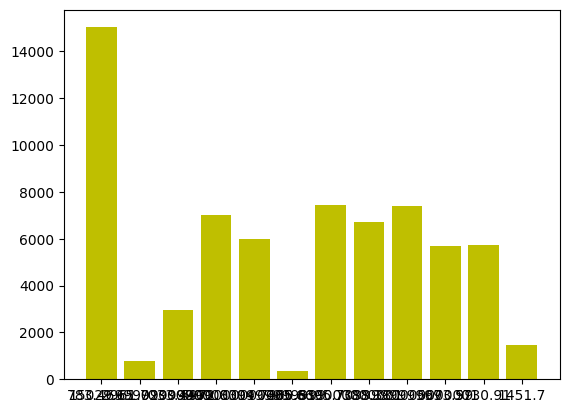

In [16]:
x = list(df_clean04.index)
y = list(df_clean04.values)
plt.bar(x, y, color='y')
plt.xticks(x, y)

In [ ]:
# 매출증가를 목표로 잡을때는 액션게임은 제작하는것이 좋다